Dataset shape: (100, 2)

First few rows:
     x     y
0  0.0   4.8
1  1.0   6.5
2  2.0  11.5
3  3.0  13.3
4  4.0  13.6


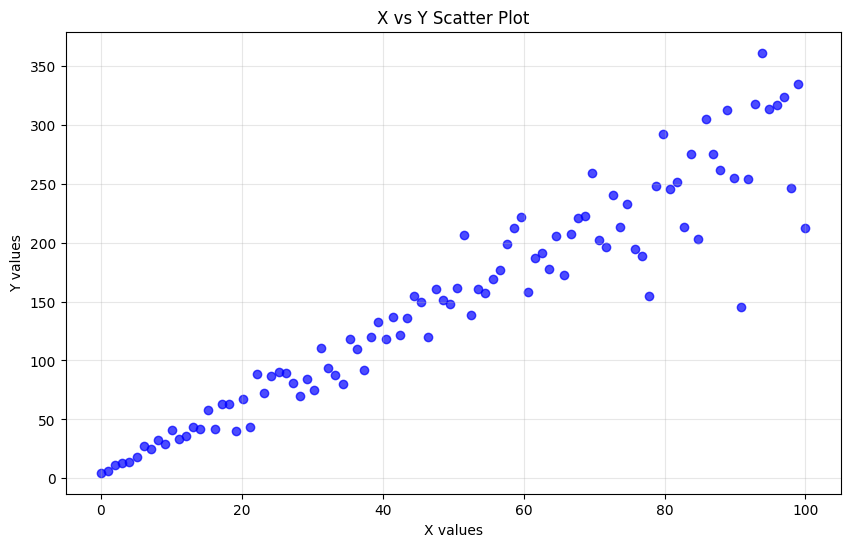

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset/single_variable_linear_regression_dataset.csv', header=None, names=['x', 'y'])

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], alpha=0.7, color='blue')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X vs Y Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()


Linear Regression Model Results:
Slope (coefficient): 2.9530
Intercept: 4.5802
R-squared: 0.9044
Mean Squared Error: 783.5986


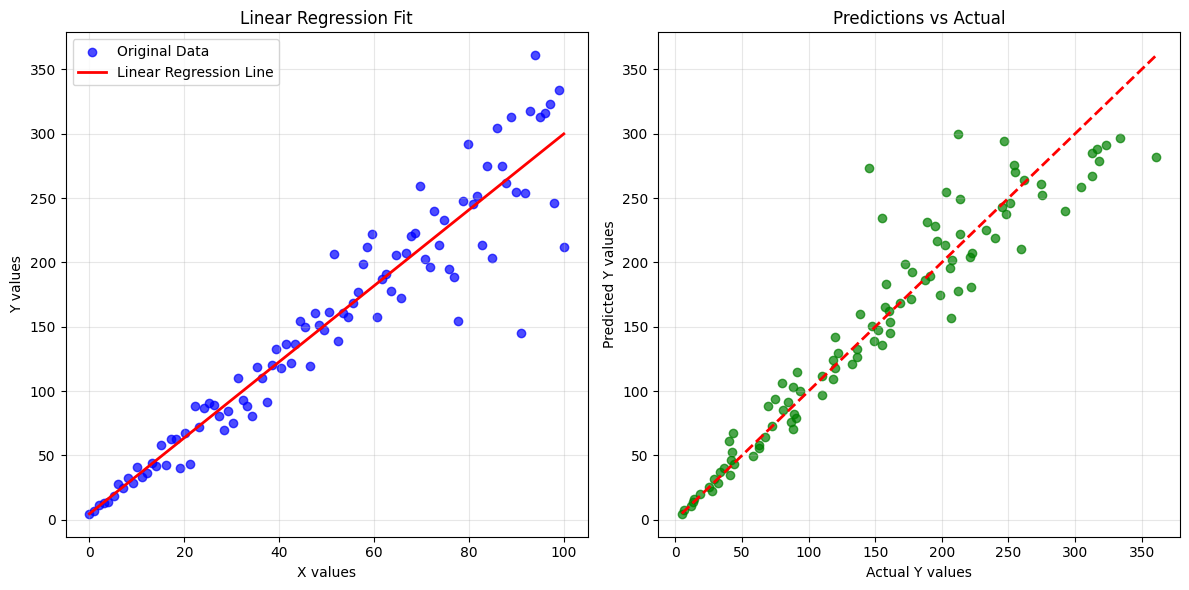


Example predictions:
For x = 5.0, predicted y = 19.3450
For x = 10.0, predicted y = 34.1099
For x = 15.0, predicted y = 48.8748


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for training
X = df[['x']].values  # Features (x values)
y = df['y'].values    # Target (y values)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Display model parameters
print("Linear Regression Model Results:")
print(f"Slope (coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")

# Plot the original data and the regression line
plt.figure(figsize=(12, 6))

# Subplot 1: Original data with regression line
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.7, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Predictions vs Actual values
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Y values')
plt.ylabel('Predicted Y values')
plt.title('Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Function to predict y for any given x
def predict_y(x_value):
    """Predict y value for a given x value"""
    prediction = model.predict([[x_value]])
    return prediction[0]

# Example predictions
print(f"\nExample predictions:")
print(f"For x = 5.0, predicted y = {predict_y(5.0):.4f}")
print(f"For x = 10.0, predicted y = {predict_y(10.0):.4f}")
print(f"For x = 15.0, predicted y = {predict_y(15.0):.4f}")


In [12]:
# Analysis function for comparing predictions with nearby data points
def analyze_prediction(x_input, tolerance=1.0):
    """
    Analyze a prediction for a given x value and show nearby data points
    """
    # Get the model's prediction
    predicted_y = predict_y(x_input)
    
    # Find nearby data points in the dataset
    nearby_data = df[abs(df['x'] - x_input) <= tolerance].copy()
    nearby_data = nearby_data.sort_values('x')
    
    # Create comparison table
    print(f"Analysis for x = {x_input}")
    print("=" * 50)
    print(f"Model Prediction: y = {predicted_y:.4f}")
    print()
    
    if len(nearby_data) > 0:
        print(f"Nearby data points (within ±{tolerance} of x={x_input}):")
        print("-" * 50)
        
        # Create a formatted table
        comparison_data = []
        for _, row in nearby_data.iterrows():
            actual_x, actual_y = row['x'], row['y']
            comparison_data.append({
                'x': actual_x,
                'y': actual_y,
                'Prediction Error': f"{abs(actual_y - predicted_y):.4f}"
            })
        
        # Display as a nice table
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        
        # Calculate average nearby y value for comparison
        avg_nearby_y = nearby_data['y'].mean()
        print(f"\nAverage y value of nearby points: {avg_nearby_y:.4f}")
        print(f"Difference from model prediction: {abs(avg_nearby_y - predicted_y):.4f}")
        
    else:
        print(f"No data points found within ±{tolerance} of x={x_input}")
        print("Try increasing the tolerance or check if the x value is within the dataset range.")
    


In [14]:
# Interactive input for user to test their own x values
print("Interactive Prediction Tool")
print("=" * 40)
print("Enter an x value to see the model's prediction and nearby data points")
print("Type 'quit' to exit")
print()

try:
    # Get user input
    user_input = input("Enter x value (or 'quit' to exit): ").strip()
    
    if user_input.lower() == 'quit':
        print("Goodbye!")
        
    x_value = float(user_input)
    
    # Use default tolerance of 1.0
    tolerance = 1.0
    
    print()
    analyze_prediction(x_value, tolerance)
    print()
    
except ValueError:
    print("Please enter a valid number for x value.")
    print()
except KeyboardInterrupt:
    print("\nGoodbye!")


Interactive Prediction Tool
Enter an x value to see the model's prediction and nearby data points
Type 'quit' to exit


Analysis for x = 2.5
Model Prediction: y = 11.9626

Nearby data points (within ±1.0 of x=2.5):
--------------------------------------------------
  x    y Prediction Error
2.0 11.5           0.4626
3.0 13.3           1.3374

Average y value of nearby points: 12.4000
Difference from model prediction: 0.4374

